In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DA_kpi/cleand.csv',)

df.drop('Unnamed: 0', inplace=True, axis=1)
df

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Year_Customer,Total_kids,Spending
0,Bachelor,Single,58138.0,58,3,8,10,4,7,64,9,0,1617
1,Bachelor,Single,46344.0,38,2,1,1,2,5,67,7,2,27
2,Bachelor,Relationship,71613.0,26,1,8,2,10,4,56,8,0,776
3,Bachelor,Relationship,26646.0,26,2,2,0,4,6,37,7,1,53
4,PhD,Relationship,58293.0,94,5,5,3,6,5,40,7,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,Bachelor,Relationship,34421.0,81,1,1,0,2,7,47,8,1,30
2151,Bachelor,Relationship,61223.0,46,2,9,3,4,5,54,8,1,1341
2152,Bachelor,Single,56981.0,91,1,2,3,13,6,40,7,0,1241
2153,Master,Relationship,69245.0,8,2,6,5,10,3,65,7,1,843


In [2]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    df[i]=df[[i]].apply(encode.fit_transform)

In [3]:
X = df.drop(['Total_kids'], axis = 1)
y = df['Total_kids']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)


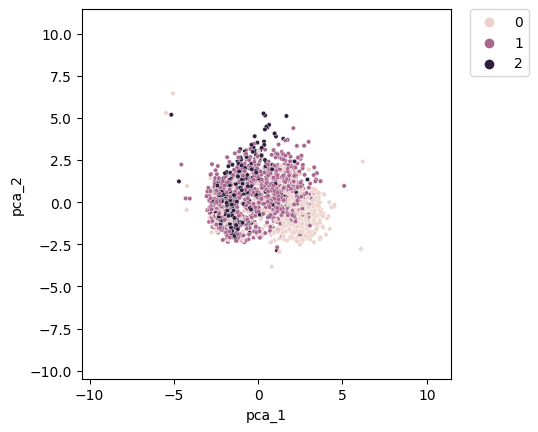

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

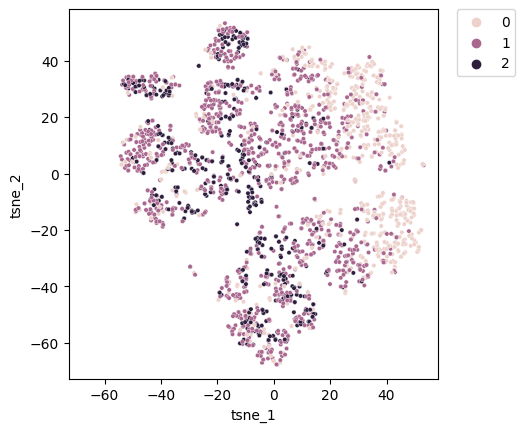

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_std)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [8]:
from PIL import Image
# image = plt.imread("/content/drive/MyDrive/DA_kpi/cat_baby.jpeg")
image = Image.open("/content/drive/MyDrive/DA_kpi/cat_baby.jpeg")

n_colors= [64, 32, 16, 8]

In [10]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import numpy as np

image = np.array(image, dtype=np.float64) / 255


#transform to a 2D numpy array.
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

kmeans_arr = []
labels_arr = []

for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample))
    labels_arr.append(kmeans_arr[i].predict(image_array))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


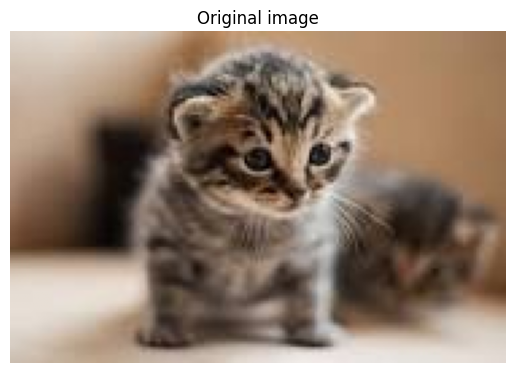

In [11]:
plt.figure(i)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(image)

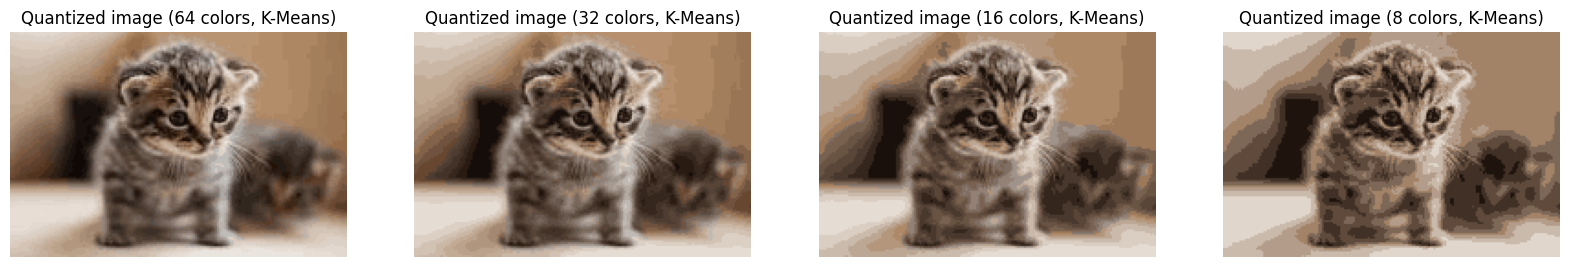

In [12]:
num_images = len(n_colors)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 5))

for i in range(num_images):
    axes[i].imshow(kmeans_arr[i].cluster_centers_[labels_arr[i]].reshape(w, h, -1))
    axes[i].set_title(f"Quantized image ({n_colors[i]} colors, K-Means)")
    axes[i].axis("off")

plt.show()

https://www.kaggle.com/datasets/hassanamin/textdb3

In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CS_DA/fake_or_real_news.csv', usecols=["title", "text", "label"])
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
df['label'].value_counts(normalize=True)

REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

In [15]:
df.isnull().isnull().sum()

title    0
text     0
label    0
dtype: int64

In [16]:
df['label'].replace({"FAKE": 0, "REAL": 1}, inplace=True)

In [17]:
from nltk.corpus import stopwords
import re
import string
import nltk
nltk.download('stopwords')

def clean_text(text):
  stop_words = stopwords.words("english")
  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

In [37]:
df

,title,text,label
0,smell hillarys fear,daniel greenfield shillman journalism fellow f...,0
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,1
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson...,0
4,battle new york primary matters,primary day new york frontrunners hillary clin...,1
...,...,...,...
6330,state department says cant find emails clinton...,state department told republican national comm...,1
6331,p pbs stand plutocratic pentagon,p pbs stand plutocratic pentagon posted oct 27...,0
6332,antitrump protesters tools oligarchy info...,antitrump protesters tools oligarchy reform a...,0
6333,ethiopia obama seeks progress peace security e...,addis ababa ethiopia president obama convened ...,1


In [30]:
from wordcloud import WordCloud

def wordcloud(state, column):
  text = ' '.join(df[df['label'] == state][column])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  # Display the word cloud using matplotlib
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # Turn off the axis
  plt.show()

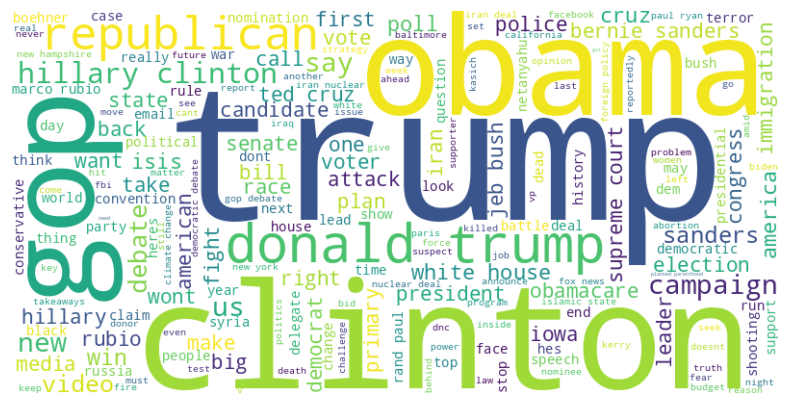

In [33]:
wordcloud(1, "title")

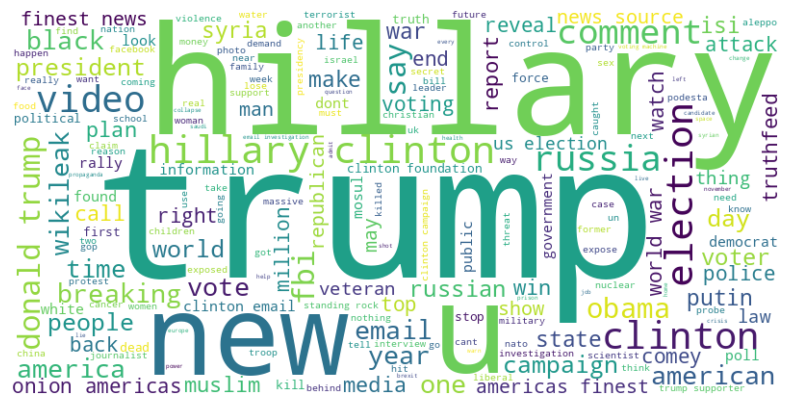

In [34]:
wordcloud(0, "title")

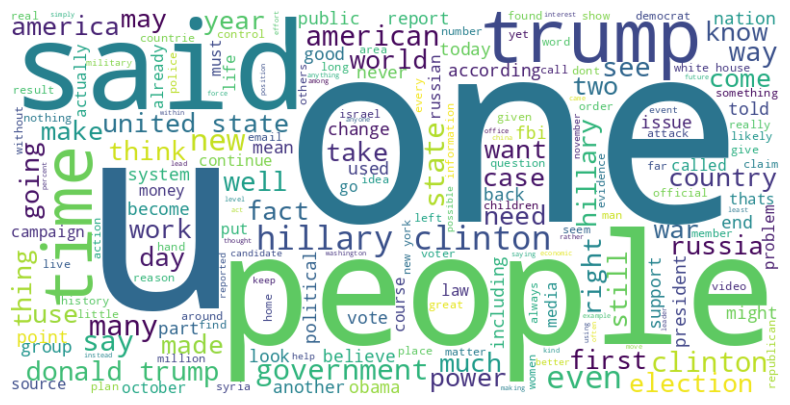

In [35]:
wordcloud(0, "text")

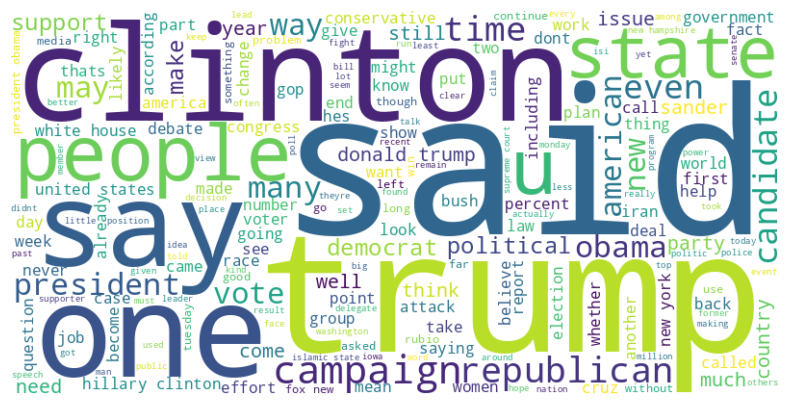

In [36]:
wordcloud(1, "text")

In [38]:
df_x_text = df['text']
df_x_title = df['title']
df_y = df['label']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_text = cv.fit_transform(df_x_text)
X_title = cv.fit_transform(df_x_title)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, df_y, train_size=0.8, random_state=42)
X_train_title, X_test_title, _, _ = train_test_split(X_title, df_y, train_size=0.8, random_state=42)

In [41]:
clf_text = MultinomialNB()
clf_text.fit(X_train_text,y_train)
clf_title = MultinomialNB()
clf_title.fit(X_train_title,y_train)

print("Accuracy of Model based on text", clf_text.score(X_test_text,y_test)*100,"%")
print("Accuracy of Model based on title", clf_title.score(X_test_title,y_test)*100,"%")

Accuracy of Model based on text 89.8973954222573 %
Accuracy of Model based on title 80.42620363062352 %


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


for i in range (2,10):
  knn_text = KNeighborsClassifier(n_neighbors=i)
  knn_text.fit(X_train_text,y_train)
  knn_title = KNeighborsClassifier(n_neighbors=i)
  knn_title.fit(X_train_title,y_train)
  y_pred_text = knn_text.predict(X_test_text)
  y_pred_title = knn_title.predict(X_test_title)
  print("Neighbors:", i)
  print("Accuracy of Model based on text", accuracy_score(y_test,y_pred_text)*100,"%")
  print("Accuracy of Model based on title", accuracy_score(y_test,y_pred_title)*100,"%")

Neighbors: 2
Accuracy of Model based on text 79.32123125493291 %
Accuracy of Model based on title 56.432517758484614 %
Neighbors: 3
Accuracy of Model based on text 80.50513022888714 %
Accuracy of Model based on title 58.011049723756905 %
Neighbors: 4
Accuracy of Model based on text 79.00552486187846 %
Accuracy of Model based on title 55.327545382794 %
Neighbors: 5
Accuracy of Model based on text 78.76874506708761 %
Accuracy of Model based on title 58.958168902920285 %
Neighbors: 6
Accuracy of Model based on text 78.13733228097868 %
Accuracy of Model based on title 55.485398579321235 %
Neighbors: 7
Accuracy of Model based on text 78.05840568271508 %
Accuracy of Model based on title 58.5635359116022 %
Neighbors: 8
Accuracy of Model based on text 76.95343330702447 %
Accuracy of Model based on title 56.03788476716653 %
Neighbors: 9
Accuracy of Model based on text 77.5848460931334 %
Accuracy of Model based on title 59.0370955011839 %
